<a href="https://colab.research.google.com/github/Saikat-Mandal/Classification-ML/blob/main/Heart-disease-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay


In [ ]:
# About the data

# 1) age (Age of the patient in years)
# 3) sex (Male/Female)
# 5) cp chest pain type
    # typical angina 0
    # atypical angina 1
    # non-anginal 2
    # asymptomatic 3
# 6) trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# 7) chol (serum cholesterol in mg/dl)
# 8) fbs (if fasting blood sugar > 120 mg/dl)
# 9) restecg (resting electrocardiographic results)
# 10) thalach: maximum heart rate achieved
# 11) exang: exercise-induced angina (True/ False)
# 12) oldpeak: ST depression induced by exercise relative to rest
# 13) slope: the slope of the peak exercise ST segment
      # unsloping: better heart rate with excersice 0
      # flatsloping: minimal change (typical healty heart) 1
      # downsloing: signs of unhealthy heart 2
# 14) ca: number of major vessels (0-3) colored by fluoroscopy
# 15) thal: [normal; fixed defect; reversible defect]
# 16) target: the predicted attribute

# Load data

In [ ]:
df= pd.read_csv('heart-disease.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


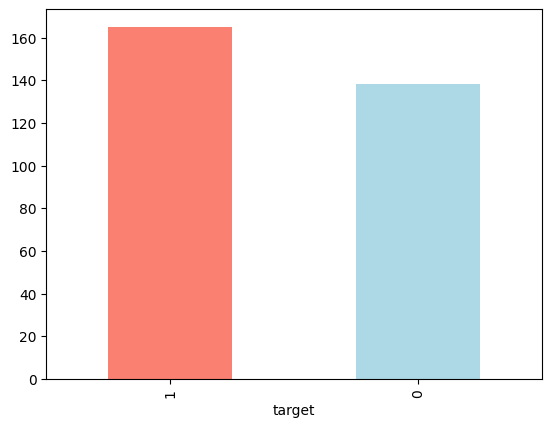

In [ ]:
df["target"].value_counts().plot(kind="bar" , color=["salmon" , "lightblue"]);

# heart disease frequency according to sex

In [ ]:
df.sex.value_counts()

,count
sex,
1,207
0,96


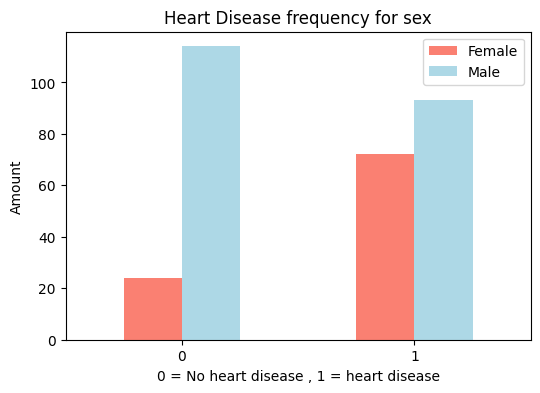

In [ ]:
pd.crosstab(df["target"] , df["sex"]).plot(kind="bar" , figsize=(6,4) , color=["salmon" , "lightblue"] )
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No heart disease , 1 = heart disease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"])
plt.xticks(rotation = 0);

In [ ]:
df["thalach"].value_counts()

,count
thalach,
162,11
163,9
160,9
173,8
152,8
...,...
117,1
71,1
118,1


# Age vs max heart for heart disease

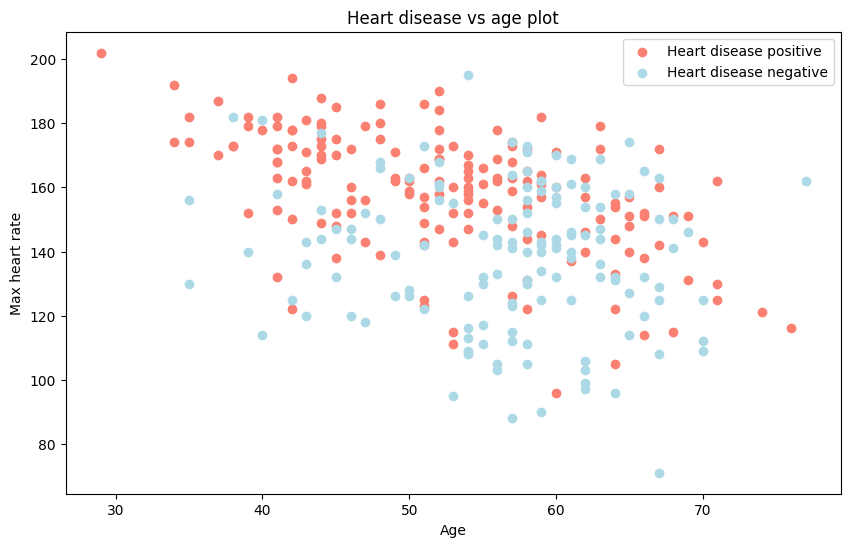

In [ ]:
plt.figure(figsize=(10,6))

# positive heart disease
plt.scatter(df.age[df.target==1] , df.thalach[df.target==1] , color = "salmon" )

# negative heart disease
plt.scatter(df.age[df.target==0] , df.thalach[df.target==0] , color='lightblue')

plt.title("Heart disease vs age plot")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Heart disease positive" , "Heart disease negative"]);

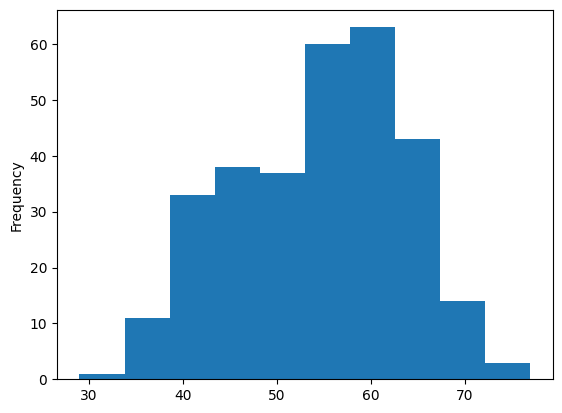

In [ ]:
# check distribution of age column with histogram

df.age.plot.hist();

# Heart disease frequency vs chest pain

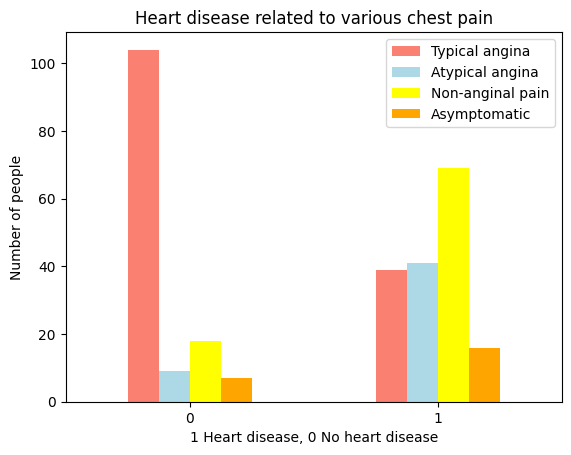

In [ ]:
pd.crosstab(df['target'] , df['cp']).plot(kind="bar" , color=["salmon" , "lightblue" , "yellow" , "orange"])
plt.title("Heart disease related to various chest pain")
plt.xlabel("1 Heart disease, 0 No heart disease")
plt.ylabel("Number of people")
plt.legend(["Typical angina" , "Atypical angina" , "Non-anginal pain" , "Asymptomatic"])
plt.xticks(rotation=0);

# Building coorelation matrix

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


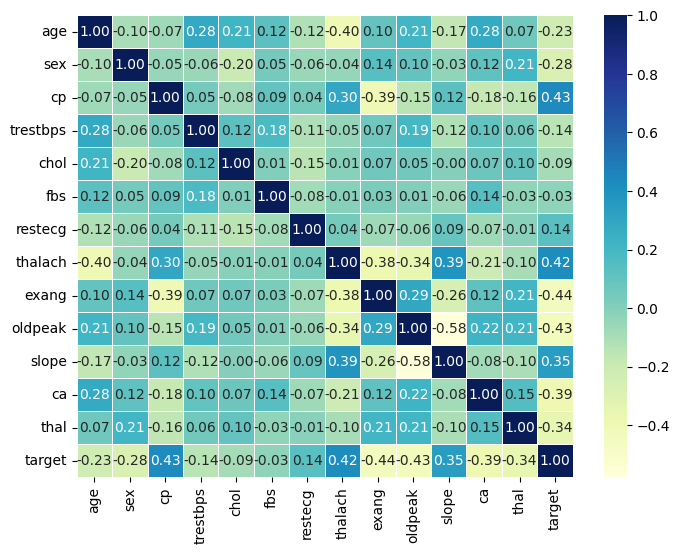

In [ ]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(8,6 ))
ax = sns.heatmap(corr_matrix , annot=True , linewidths=0.5 , fmt=".2f" , cmap="YlGnBu")

# Modelling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# split data into X and y
X = df.drop('target' , axis = 1)
y = df.target

In [ ]:
# Split into train and test sets
np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [ ]:
# intiating models
models = {
    "Logistic regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Random forest" : RandomForestClassifier()
}

# create a function to fit and score models

def fit_and_score(models , X_train, y_train, X_test , y_test):
  np.random.seed(42)
  scores = {}
  for model_name , model in models.items():
    model.fit(X_train , y_train)
    scores[model_name] = model.score(X_test , y_test)
  return scores



In [ ]:
scores = fit_and_score(models , X_train , y_train , X_test , y_test)
scores

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random forest')])

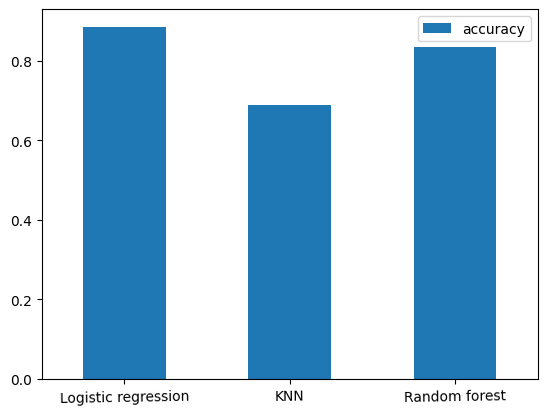

In [ ]:
# model comparison
model_comparison = pd.DataFrame(scores , index = ["accuracy"])
model_comparison.T.plot(kind = 'bar')
plt.xticks(rotation=1)

# Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross_validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve

In [ ]:
# Hyperparameter tuning for KNN
train_scores = []
test_scores = []

# create a list of different values of n neightbors
neighbors = range(1,21)

# knn instance setup
knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors = i)
  knn.fit(X_train , y_train)
  train_scores.append(knn.score(X_train , y_train))
  test_scores.append(knn.score(X_test , y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score of test data 75.41%


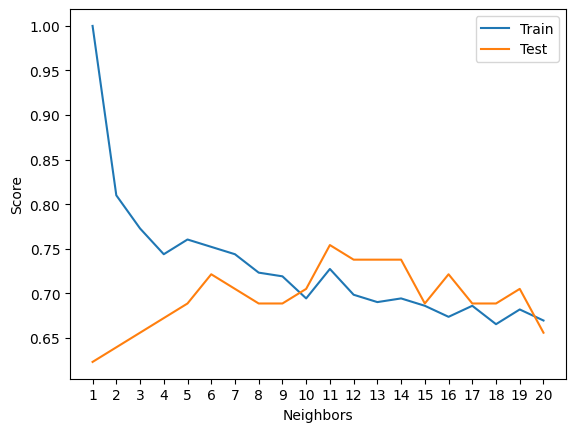

In [ ]:
plt.plot(neighbors , train_scores , label="Train score")
plt.plot(neighbors , test_scores , label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.legend(["Train" , "Test"])

print(f"Max KNN score of test data {max(test_scores)*100:.2f}%");

Tuning LogisticRegression and RandomForestClassigfier using RandomisedSearchCV

In [ ]:
# creating hypermparameter grid for LogisticRegression

log_reg_grid = {
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear"]
}

# creating hypermparameter grid for RandomForestClassifier

rf_grid = {
    "n_estimators" : np.arange(10 , 1000 , 50),
    "max_depth" : [None , 3, 5 , 10],
    "min_samples_split" : np.arange(2 , 20 , 2),
    "min_samples_leaf" : np.arange(1,20,2)
}

In [ ]:
# now lets tune...

# LogisticRegression

np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression() ,
                                param_distributions=log_reg_grid,
                                cv=5 ,
                                n_iter=20,
                                verbose=True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [ ]:
rs_log_reg.score(X_test , y_test)

0.8852459016393442

In [ ]:
# tune RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv=5,
                           n_iter = 20,
                           verbose=True)

rs_rf.fit(X_train , y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [ ]:
# score for test data
rs_rf.score(X_test , y_test)

0.8688524590163934

# Hyperparameter tuning using GridSearchCV

In [ ]:
log_reg_grid = {
     "C" : np.logspace(-4,4,30),
    "solver" : ["liblinear"]
}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose = True)

gs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test , y_test)

0.8852459016393442

# Evaluation of model beyond accuracy
- ROC curve
- Confusion matrix
- Classification report
- Precision
- Recall
- F1 score

In [ ]:
# to evaluate lets first make predictions with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

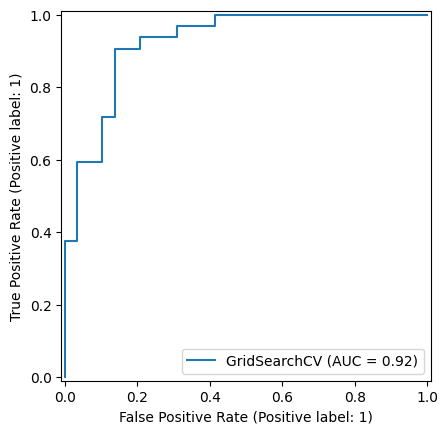

In [ ]:
# plot roc curve

RocCurveDisplay.from_estimator(gs_log_reg , X_test , y_test);

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test , y_preds)
cm

array([[25,  4],
       [ 3, 29]])

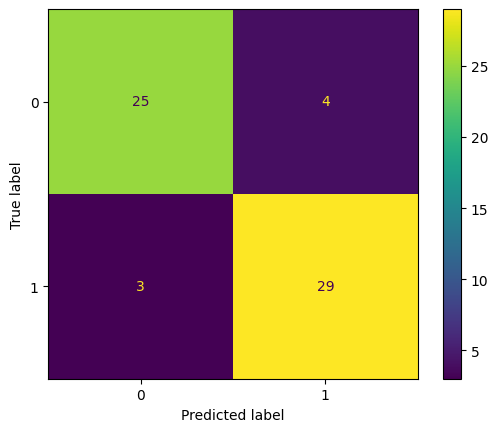

In [ ]:
disp = ConfusionMatrixDisplay(cm,
                              display_labels=gs_log_reg.classes_)

disp.plot();


In [ ]:
# classification_report and cross validated precision and f1 score
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculating evaluation metrics using Cross-validation

In [ ]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [ ]:
# creating the model again with the best parameter

model = LogisticRegression(C=0.20433597178569418 , solver='liblinear')


In [ ]:
# cross-validated accuracy , precision , recall and f1 score

acc = cross_val_score(model, X, y, cv=5 , scoring='accuracy')
precision = cross_val_score(model, X, y, cv=5 , scoring = 'precision')
recall = cross_val_score(model, X, y, cv=5 , scoring= 'recall')
f1 = cross_val_score(model, X, y, cv=5 , scoring='f1')

np.mean(acc), np.mean(precision) , np.mean(recall) , np.mean(f1)


(np.float64(0.8446994535519124),
 np.float64(0.8207936507936507),
 np.float64(0.9212121212121213),
 np.float64(0.8673007976269721))

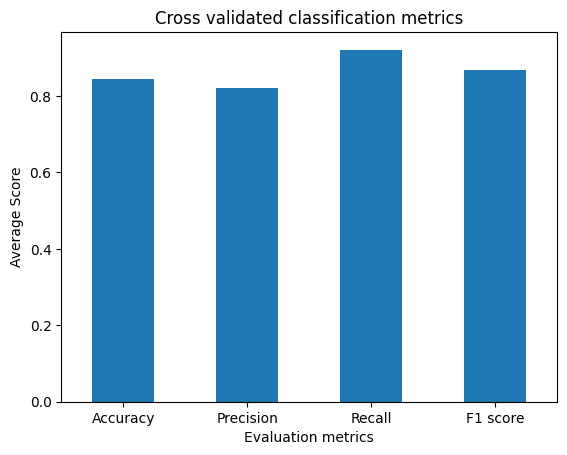

In [ ]:
# lets visualize these

cv_metric = pd.DataFrame({
    "Accuracy" : np.mean(acc),
    "Precision" : np.mean(precision),
    "Recall" : np.mean(recall),
    "F1 score" : np.mean(f1)
} , index=[0])

cv_metric.T.plot(kind="bar" , legend=False)
plt.title("Cross validated classification metrics")
plt.xlabel("Evaluation metrics")
plt.ylabel("Average Score")
plt.xticks(rotation = 0);




# Feature importance

In [ ]:
model = LogisticRegression(C=0.20433597178569418 , solver='liblinear')
model.fit(X_train , y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [ ]:
model.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# match coefficient of features to columns
feature_dict = dict(zip(df.columns , list(model.coef_[0])))
feature_dict

{'age': np.float64(0.0032076883508599633),
 'sex': np.float64(-0.8606204883695241),
 'cp': np.float64(0.660014324982524),
 'trestbps': np.float64(-0.01155970600550047),
 'chol': np.float64(-0.0016649614843449207),
 'fbs': np.float64(0.040172360271308105),
 'restecg': np.float64(0.31603405294617176),
 'thalach': np.float64(0.02458922341328129),
 'exang': np.float64(-0.604701713592625),
 'oldpeak': np.float64(-0.5679545646616215),
 'slope': np.float64(0.4508539209693025),
 'ca': np.float64(-0.6373332766360461),
 'thal': np.float64(-0.6755509369619848)}

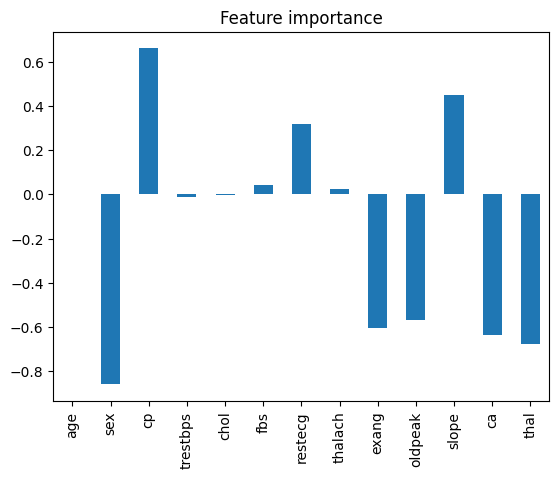

In [ ]:
# vizualise it
feature_df = pd.DataFrame(feature_dict , index=[0])

feature_df.T.plot.bar( title="Feature importance" , legend=False);